# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [ ]:
# 필요한 모듈 불러오기
import pandas as pd

: 

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

## 데이터 전처리

In [4]:
spam.v1 = spam.v1.replace(['ham','spam'],[0,1])
spam.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [6]:
spam.drop_duplicates(subset=['v2'], inplace=True)
len(spam)

5169

In [7]:
spam = spam.reset_index()
spam

,index,v1,v2
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5164,5567,1,This is the 2nd time we have tried 2 contact u...
5165,5568,0,Will Ì_ b going to esplanade fr home?
5166,5569,0,"Pity, * was in mood for that. So...any other s..."
5167,5570,0,The guy did some bitching but I acted like i'd...


<AxesSubplot:ylabel='v1'>

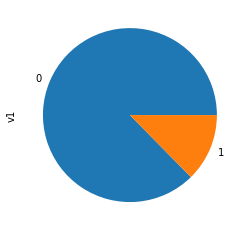

In [8]:
spam['v1'].value_counts().plot(kind = 'pie')

### 특수 문자 제거

In [9]:
import re

def cleanText(data):
  text = re.sub('[^a-zA-Z]', ' ', data).lower()
  return text

spam.v2 = spam.v2.apply(cleanText)

In [10]:
spam.iloc[5]['v2']

'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send         to rcv'

## Tokenizing


In [11]:
import nltk

In [12]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['freemsg',
 'hey',
 'there',
 'darling',
 'it',
 's',
 'been',
 'week',
 's',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'd',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv']

In [13]:
from nltk.tokenize import word_tokenize

In [56]:
spam

,index,v1,v2
0,0,0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,1,0,ok lar joking wif u oni
2,2,1,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
3,3,0,u dun say so early hor u c already then say
4,4,0,nah i don t think he goes to usf he lives around here though
...,...,...,...
5164,5567,1,this is the nd time we have tried contact u u have won the pound prize claim is easy call now only p per minute bt national rate
5165,5568,0,will b going to esplanade fr home
5166,5569,0,pity was in mood for that so any other suggestions
5167,5570,0,the guy did some bitching but i acted like i d be interested in buying something else next week and he gave it to us for free


## 불용어 제거

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
print(sw)

{'as', 'of', 'too', "wasn't", 'more', 'now', "you're", 'into', "you've", 'her', 'an', "you'll", 'haven', 'hers', 'does', 'ourselves', 'because', 'while', "it's", 'those', 'shan', 'ma', 'is', 'itself', 'how', 'they', 'that', 'be', 'which', 'weren', 'each', 'its', 'again', "haven't", 'until', "hadn't", 'do', 'ours', 'whom', 'this', 'over', 'their', 'shouldn', 'themselves', 'and', 'for', 'about', 're', 'yourselves', 'own', 'd', 'having', 'am', 'out', 'with', 'off', 'had', 'myself', 'any', 'against', 'all', 'me', 'but', 'are', "isn't", 'below', 'has', 's', 'up', 'before', "needn't", 't', 'doesn', 'needn', 'him', 'm', "shan't", 'when', "didn't", 'aren', 'yours', 'theirs', 'them', 'from', "doesn't", 'i', 'will', 'same', 'other', 'should', 'doing', 'didn', 'isn', 'no', 'wouldn', "she's", 'she', 'your', 'who', 'yourself', 'by', 'mightn', 'under', 'won', 'mustn', 'we', 'just', 'why', 'the', "weren't", 've', "wouldn't", 'few', 'my', 'there', 'further', 'only', 'to', 'did', 'don', 'himself', 'on'

In [16]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

wt = spam.copy()
result = []
for row in wt.v2:
    tokenize = word_tokenize(row)
    words = [word for word in tokenize if word not in sw]
    result.append(words)
    
wt.v2 = result
wt

,index,v1,v2
0,0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,1,0,"[ok, lar, joking, wif, u, oni]"
2,2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,4,0,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...
5164,5567,1,"[nd, time, tried, contact, u, u, pound, prize,..."
5165,5568,0,"[b, going, esplanade, fr, home]"
5166,5569,0,"[pity, mood, suggestions]"
5167,5570,0,"[guy, bitching, acted, like, interested, buyin..."


In [23]:
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer

In [29]:
import nltk
nltk.download("punkt")
nltk.download("treebank")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
from nltk.tokenize import WordPunctTokenizer

In [34]:
from nltk.tokenize import TreebankWordTokenizer
tb_tokenizer = TreebankWordTokenizer()

In [39]:
def tokenizing(tokenizer):
  result=[]
  for row in spam.v2:
    tokenize = tokenizer.tokenize(row)
    words = [word for word in tokenize if word not in sw] # 불용어 제거
    result.append(words)
  return result

In [40]:
tb = spam.copy()
tb.v2 = tokenizing(tb_tokenizer)
print(tb)

      index  v1                                                 v2
0         0   0  [go, jurong, point, crazy, available, bugis, n...
1         1   0                     [ok, lar, joking, wif, u, oni]
2         2   1  [free, entry, wkly, comp, win, fa, cup, final,...
3         3   0      [u, dun, say, early, hor, u, c, already, say]
4         4   0     [nah, think, goes, usf, lives, around, though]
...     ...  ..                                                ...
5164   5567   1  [nd, time, tried, contact, u, u, pound, prize,...
5165   5568   0                    [b, going, esplanade, fr, home]
5166   5569   0                          [pity, mood, suggestions]
5167   5570   0  [guy, bitching, acted, like, interested, buyin...
5168   5571   0                                 [rofl, true, name]

[5169 rows x 3 columns]


In [41]:
wp = spam.copy()
wp.v2 = tokenizing(WordPunctTokenizer())
print(wp)

      index  v1                                                 v2
0         0   0  [go, jurong, point, crazy, available, bugis, n...
1         1   0                     [ok, lar, joking, wif, u, oni]
2         2   1  [free, entry, wkly, comp, win, fa, cup, final,...
3         3   0      [u, dun, say, early, hor, u, c, already, say]
4         4   0     [nah, think, goes, usf, lives, around, though]
...     ...  ..                                                ...
5164   5567   1  [nd, time, tried, contact, u, u, pound, prize,...
5165   5568   0                    [b, going, esplanade, fr, home]
5166   5569   0                          [pity, mood, suggestions]
5167   5570   0  [guy, bitching, acted, like, interested, buyin...
5168   5571   0                                 [rofl, true, name]

[5169 rows x 3 columns]


In [46]:
import numpy as np
import pandas as pd

In [51]:
pd.set_option('display.max_colwidth',-1)

result = pd.DataFrame([['wordtokenize', wt.iloc[5]['v2']],
                     ['TreebankWordTokenizer', tb.iloc[5]['v2']],
                     ['WordPunctTokenizer', wp.iloc[5]['v2']]], columns = ['Tokenizer','result'])
result

C:\Users\pc\AppData\Local\Temp\ipykernel_39660\3281518368.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,Tokenizer,result
0,wordtokenize,freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
1,TreebankWordTokenizer,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"
2,WordPunctTokenizer,"[freemsg, hey, darling, week, word, back, like, fun, still, tb, ok, xxx, std, chgs, send, rcv]"


특수문자와 불용어를 제거한 후 tokenizing 은 유의미한 차이를 보이지 않는 듯 하다.

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

Word2vec의 주요 아이디어는 "비슷한 분포를 가진 단어라면 비슷한 의미를 가질 것이다." 이다. 자주 등장하는 두 단어는 비슷한 의미를 가진다는 의미와 같다. 단어 사이의 유사함과 통사적 유사함을 정교하게 표현한다는 강점을 가지고 사용된다.

# Skip - Gram

In [58]:
wp.v2

0       [go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]                        
1       [ok, lar, joking, wif, u, oni]                                                                                             
2       [free, entry, wkly, comp, win, fa, cup, final, tkts, st, may, text, fa, receive, entry, question, std, txt, rate, c, apply]
3       [u, dun, say, early, hor, u, c, already, say]                                                                              
4       [nah, think, goes, usf, lives, around, though]                                                                             
                             ...                                                                                                   
5164    [nd, time, tried, contact, u, u, pound, prize, claim, easy, call, p, per, minute, bt, national, rate]                      
5165    [b, going, esplanade, fr, home]                                     

In [59]:
! conda install -y gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pc\anaconda3

  added / updated specs:
    - gensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2022.6.15          |   py39haa95532_0         153 KB
    conda-4.14.0               |   py39haa95532_0         937 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.6.1~ --> pkgs/main::ca-certificates-2022.07.19-haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2022.6.15~ --> pkgs/main/win-64::certifi-2022.6.15-py39haa95532_0
  conda              conda-forge::conda-4.14.0-py39hcbf530~ --> pkgs/main::conda-4.14.0-py39haa95532_0
 

## 토큰 빈도수

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# 정상 메일 토큰 빈도수
ct_vector1 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_ham = sum(wp[wp.v1 == 0]['v2'], []) 
ct_ham = ct_vector1.fit_transform(corpus_ham)

In [80]:
count_ham = pd.DataFrame( {'word' : ct_vector1.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10) # 상위 10개

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
160,gt,288
245,lt,287
298,ok,255
155,got,227
212,know,225
229,like,222
153,good,215
67,come,212
450,ur,198
426,time,192


In [81]:
# spam 메일 토큰 빈도수
ct_vector2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(wp[wp.v1 == 1]['v2'], []) 
ct_spam = ct_vector2.fit_transform(corpus_spam)

In [82]:
count_spam = pd.DataFrame( {'word' : ct_vector2.get_feature_names(),
                           'count' : ct_spam.sum(axis = 0).flat})
count_spam.sort_values('count', ascending = False).head(10) # 상위 10개

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
144,free,197
437,txt,141
446,ur,119
396,stop,114
251,mobile,111
415,text,109
61,claim,96
345,reply,96
486,www,83
322,prize,82


In [60]:
from gensim.models.word2vec import Word2Vec

In [102]:
model = Word2Vec(wp[wp.v1 == 1]['v2'],         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [103]:
model.save('word2vec.model')

In [104]:
model = Word2Vec.load('word2vec.model')

In [105]:
model.wv['free']

array([-0.12697235,  0.17873126,  0.00917729,  0.04774045,  0.04983213,
       -0.3183044 ,  0.06340779,  0.3627363 , -0.15260184, -0.13191845,
       -0.04508005, -0.21811609,  0.03258903, -0.00776026,  0.10318357,
       -0.11489538,  0.01857102, -0.20338188, -0.02372381, -0.34794012,
        0.0759846 ,  0.09172342,  0.11160284, -0.09558625, -0.07979911,
        0.01351385, -0.14549081, -0.13445719, -0.18485789,  0.02839618,
        0.20579396,  0.01613657,  0.05163672, -0.08718101, -0.1392553 ,
        0.18269157,  0.01795943, -0.1227628 , -0.05834493, -0.24545982,
        0.01107112, -0.2154894 , -0.1155944 , -0.08909006,  0.17233887,
       -0.10991798, -0.14960937,  0.03219679,  0.16723125,  0.11586914,
        0.10903287, -0.1612806 ,  0.04058929,  0.0306169 , -0.09393346,
        0.11316695,  0.03703046,  0.02580187, -0.2559138 ,  0.06118606,
        0.03958989, -0.01570959, -0.01404729, -0.15912132, -0.2548095 ,
        0.04643291,  0.05343216,  0.1475917 , -0.27400813,  0.20

In [127]:
model.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

'txt'

In [131]:
model.wv.most_similar('free')

[('shit', 0.9984922409057617),
 ('guys', 0.9983488917350769),
 ('place', 0.9983454942703247),
 ('believe', 0.9983223676681519),
 ('fine', 0.9983163475990295),
 ('need', 0.998307466506958),
 ('someone', 0.9982812404632568),
 ('missed', 0.9982679486274719),
 ('sir', 0.9982408881187439),
 ('tot', 0.9982295036315918)]

In [132]:
model.wv.most_similar(positive=['mobile', 'free'], negative=['msg'])

[('talk', 0.9968039393424988),
 ('friend', 0.9967077970504761),
 ('able', 0.9966264963150024),
 ('room', 0.9966209530830383),
 ('asked', 0.9965845942497253),
 ('want', 0.9965538382530212),
 ('someone', 0.9965472221374512),
 ('text', 0.9965046644210815),
 ('gonna', 0.9964979887008667),
 ('cool', 0.9964866042137146)]

## ham 확인하기

In [133]:
model1 = Word2Vec(wp[wp.v1 == 0]['v2'],         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [134]:
model1.save('word2vec.model')

In [135]:
model1 = Word2Vec.load('word2vec.model')

In [136]:
model1.wv['good']

array([-0.1443505 ,  0.20394184,  0.07682936,  0.03954577,  0.13750094,
       -0.3645187 ,  0.16928954,  0.40799648, -0.11899674, -0.1311487 ,
       -0.0536454 , -0.21566293, -0.07567759,  0.0831868 ,  0.06097643,
       -0.14391026, -0.01299365, -0.15194145,  0.00999578, -0.4197288 ,
        0.09025447,  0.1592725 ,  0.07344285, -0.10049437, -0.06827156,
        0.00423986, -0.16068932, -0.11644737, -0.15143156,  0.006872  ,
        0.21309324,  0.07517155,  0.09136862, -0.13171464, -0.05964   ,
        0.19532524,  0.05206435, -0.15981022, -0.16918407, -0.3886908 ,
       -0.0346077 , -0.18204083, -0.0322253 ,  0.02765786,  0.13075146,
       -0.07280753, -0.11469225, -0.03836975,  0.13274479,  0.12872842,
        0.0895739 , -0.215694  , -0.02176245, -0.03556813, -0.07683107,
        0.12459389,  0.11901166, -0.01152744, -0.26687524,  0.09790961,
        0.03397292,  0.01984393, -0.05374684, -0.03103813, -0.23643617,
        0.04347331,  0.083359  ,  0.1292469 , -0.21213764,  0.20

In [137]:
model1.wv.doesnt_match("gt lt ok got know like good come ur time".split())

'gt'

In [138]:
model1.wv.most_similar('ok')

[('god', 0.9985902905464172),
 ('gonna', 0.9984800815582275),
 ('person', 0.9984670877456665),
 ('change', 0.9984626173973083),
 ('left', 0.9984471201896667),
 ('special', 0.9984450340270996),
 ('shit', 0.9984412789344788),
 ('home', 0.9984278082847595),
 ('havent', 0.9984269142150879),
 ('lar', 0.99842369556427)]

*skip gram을 활용하여 spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 txt

'free'와 가장 유사한 단어

[('shit', 0.9984922409057617),

 ('guys', 0.9983488917350769),
 
 ('place', 0.9983454942703247),
 
 ('believe', 0.9983223676681519),
 
 ('fine', 0.9983163475990295),
 
 ('need', 0.998307466506958),
 
 ('someone', 0.9982812404632568),
 
 ('missed', 0.9982679486274719),
 
 ('sir', 0.9982408881187439),
 
 ('tot', 0.9982295036315918)]

ham에서 가장 연관이 없는 단어는 'gt'

'ok'와 가장 유사도가 높은 단어들 10개

[('god', 0.9985902905464172),

 ('gonna', 0.9984800815582275),
 
 ('person', 0.9984670877456665),
 
 ('change', 0.9984626173973083),
 
 ('left', 0.9984471201896667),
 
 ('special', 0.9984450340270996),
 
 ('shit', 0.9984412789344788),
 
 ('home', 0.9984278082847595),
 
 ('havent', 0.9984269142150879),
 
 ('lar', 0.99842369556427)]

# skip-gram 결과

1. spam 메일에서 많이 사용되는 단어들을 보면 need : 무엇이 필요합니다, someonem : 누군가가 위험에 빠졌다. , missed : 무엇인가 잊으셨다. , sir : 고객께서는~ 는 등 스팸 메일을 구분하는데 합리적인 단어들이 있다.


2. ham 에서는 ok, gonna, shit, havent 등 줄임말이나 컴퓨터가 아닌 인간이 텍스트로 쳤을 법한 단어들이 있는 것으로 보아 단체 스팸 메일이라고 보기 힘든 단어들이 있다.


-한계 : 가장 유사하지 않는 단어로 뽑힌 txt와 gt는 spam 과 ham 을 구분하기에는 크게 의미 있지는 않아보인다.

# Continuous Bag Of Word(CBOW)

In [139]:
model3 = Word2Vec(wp[wp.v1 == 1]['v2'],         # 리스트 형태의 데이터
                 sg=0,         # 0: CBOW, 1: Skip-gram
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [141]:
model3.save('word2vec.model')

In [142]:
model3 = Word2Vec.load('word2vec.model')

In [143]:
model3.wv['free']

array([-0.04899706,  0.08751968,  0.00543651,  0.01689396,  0.01165799,
       -0.17804685,  0.03880432,  0.214122  , -0.0569067 , -0.06772427,
       -0.00833088, -0.10876993, -0.01424619, -0.00094331,  0.0467719 ,
       -0.05459564,  0.01318529, -0.08884684, -0.00528288, -0.1871343 ,
        0.03333976,  0.04733661,  0.05313151, -0.05537691, -0.04830177,
        0.01052547, -0.08197225, -0.08177868, -0.09773952,  0.00282098,
        0.12024564,  0.01060125,  0.03878962, -0.05439466, -0.05359166,
        0.11253292,  0.02871179, -0.06539643, -0.03939414, -0.13729575,
        0.01729326, -0.0948604 , -0.07342607, -0.03718002,  0.08715764,
       -0.05607364, -0.08486367,  0.01042789,  0.08325735,  0.05615759,
        0.04962488, -0.07143588,  0.02147228,  0.02951938, -0.03939703,
        0.06679582,  0.05545926,  0.01085535, -0.09107533,  0.03903873,
        0.00858373,  0.01531649, -0.03157279, -0.07993756, -0.11540367,
        0.05298875,  0.04392067,  0.06114257, -0.13001806,  0.11

In [144]:
model3.wv.doesnt_match("free txt ut stop mobile text claim reply www prize".split())

'reply'

In [145]:
model3.wv.most_similar('free')

[('call', 0.9950637817382812),
 ('txt', 0.993674099445343),
 ('p', 0.993118941783905),
 ('u', 0.9929732084274292),
 ('www', 0.9929603338241577),
 ('text', 0.9925583004951477),
 ('ur', 0.9924313426017761),
 ('service', 0.9921772480010986),
 ('cash', 0.9920705556869507),
 ('claim', 0.9918743371963501)]

In [147]:
model3.wv.most_similar('ok')

[('gift', 0.7601175308227539),
 ('inc', 0.7552603483200073),
 ('see', 0.7517488598823547),
 ('nokia', 0.7505438327789307),
 ('want', 0.7502791881561279),
 ('msg', 0.7498944997787476),
 ('camcorder', 0.7497456669807434),
 ('points', 0.7487547993659973),
 ('new', 0.7482020854949951),
 ('waiting', 0.7467624545097351)]

# ham 확인

In [140]:
model4 = Word2Vec(wp[wp.v1 == 0]['v2'],         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [148]:
model4.save('word2vec.model')

In [149]:
model4 = Word2Vec.load('word2vec.model')

In [150]:
model4.wv['good']

array([-1.54401571e-01,  2.04134196e-01,  7.89765045e-02,  3.53333764e-02,
        1.06312148e-01, -3.58860224e-01,  1.96674779e-01,  4.00581598e-01,
       -1.38293400e-01, -1.15760490e-01, -4.14281264e-02, -2.03555122e-01,
       -9.91389081e-02,  7.37232044e-02,  4.08410877e-02, -1.40083313e-01,
       -1.45338485e-02, -1.86228499e-01, -2.44670053e-04, -3.97594780e-01,
        7.10906610e-02,  1.78308964e-01,  1.04171343e-01, -8.29384625e-02,
       -4.26469892e-02, -8.92305002e-03, -1.57449916e-01, -1.10313378e-01,
       -1.56483725e-01,  8.03323742e-03,  2.27580786e-01,  5.75542599e-02,
        1.21415488e-01, -1.01168513e-01, -9.13109183e-02,  2.06002802e-01,
        9.89786536e-02, -1.59464866e-01, -1.89905345e-01, -3.84407908e-01,
       -5.17883971e-02, -1.58695355e-01, -4.36115973e-02,  4.81113531e-02,
        1.36939928e-01, -6.39539063e-02, -9.60881412e-02, -3.45331840e-02,
        1.16793439e-01,  1.19701251e-01,  9.63019207e-02, -2.05732450e-01,
       -3.41446213e-02, -

In [151]:
model4.wv.doesnt_match("gt lt ok got know like good come ur time".split())

'gt'

In [152]:
model4.wv.most_similar('ok')

[('special', 0.9984639286994934),
 ('havent', 0.9984007477760315),
 ('lar', 0.998380720615387),
 ('person', 0.9983792304992676),
 ('need', 0.9983651041984558),
 ('someone', 0.9983472228050232),
 ('plan', 0.9983054995536804),
 ('friend', 0.998300313949585),
 ('probably', 0.9982932806015015),
 ('able', 0.9982566237449646)]

*CBOW을 활용하여 spam 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 reply

spam 중 'free'와 가장 유사한 단어

[('call', 0.9950637817382812),

 ('txt', 0.993674099445343),
 
 ('p', 0.993118941783905),
 
 ('u', 0.9929732084274292),
 
 ('www', 0.9929603338241577),
 
 ('text', 0.9925583004951477),
 
 ('ur', 0.9924313426017761),
 
 ('service', 0.9921772480010986),
 
 ('cash', 0.9920705556869507),
 
 ('claim', 0.9918743371963501)]

*CBOW을 활용하여 ham 빈도수 상위 10개 단어 중 가장 유사하지 않은 단어 gt - skip 과 동일

ham 에서 'ok'와 가장 유사한 단어

[('special', 0.9984639286994934),

 ('havent', 0.9984007477760315),
 
 ('lar', 0.998380720615387),
 
 ('person', 0.9983792304992676),
 
 ('need', 0.9983651041984558),
 
 ('someone', 0.9983472228050232),
 
 ('plan', 0.9983054995536804),
 
 ('friend', 0.998300313949585),
 
 ('probably', 0.9982932806015015),
 
 ('able', 0.9982566237449646)]

## 결과

1. spam에는 응답을 바란다는 메시지가 들어갈 가능성이 크다고 판단되어 CBOW의 reply가 조금더 합리적이라고 판단됨

2. txt,call,cash, claim, www 등 일반적인 메시지에 담기지 않는 링크나 전화 파일 명등이 이상하게 배치되어 있는 것을 확인할 수 있고 주목할만한 점으로는 cash와 같이 직접적인 spam메일성 메시지도 포함되어있을 뿐만 아니라 skip-gram에서 판단되었던 구어체 'gonna', 'havent' 와 같이 ur 이 들어있다는 점에서 url과 혼용성을 구분해봐야겠지만 나름 신기한 유사도를 보여준다.

3. skip-gram과 비슷한 유사도의 단어들이 대부분인반면 probably,able등과 같이 가능성을 나타내는 단어들이 눈에 띄는것으로 보아 아마도 지인사이의 메일에는 구어체의 형식이 확실히 많이 쓰이는 듯하다.

# 부록

### genism 으로 학습된 단어 임베딩을 케라스에서 불러오기

In [93]:
from keras.models import Sequential
from keras.layers import Embedding

In [94]:
NUM_WORDS, EMB_DIM = model.wv.vectors.shape

In [95]:
emb = Embedding(input_dim=NUM_WORDS, output_dim=EMB_DIM,
                trainable=False, weights=[model.wv.vectors])

In [96]:
net = Sequential()
net.add(emb)

In [98]:
i = model.wv.index_to_key.index('free')

In [99]:
net.predict([i])

1/1 [==============================] - 0s 77ms/step


array([[-0.17100777,  0.22741504,  0.1415306 ,  0.09078712,  0.13565189,
        -0.3124442 ,  0.15087669,  0.3452993 , -0.20554623, -0.08115021,
         0.10307804, -0.37570322,  0.12328479,  0.01569165, -0.01478906,
        -0.15338697, -0.01407131, -0.36315718, -0.07180541, -0.2618075 ,
         0.09475271,  0.12284674,  0.096205  , -0.19126713, -0.15548222,
         0.06995478, -0.13768817, -0.11744229, -0.15492031, -0.04076614,
         0.31780586, -0.03640383,  0.164043  , -0.04313457, -0.07690811,
         0.34024894,  0.0645443 , -0.22640206, -0.15790546, -0.37338832,
        -0.09059562, -0.21744114, -0.12313711,  0.01098755,  0.11266868,
        -0.06786525, -0.02781567, -0.13342474,  0.00813981,  0.09535321,
         0.01803571, -0.1154272 , -0.16399351, -0.02158661, -0.14056829,
         0.15666394,  0.07962795, -0.01083533, -0.14108612,  0.00414327,
        -0.07731659, -0.00915988,  0.06944455,  0.01070126, -0.2169706 ,
         0.26310647,  0.03318975,  0.15881616, -0.2

'free'의 임베딩된 벡터 값을 확인해보면 gensim에서와 같다는 것을 확인할 수 있다.

## 학습된 임베딩 사용하기
https://code.google.com/archive/p/word2vec 에서 1천억 단어 규모의 구글 뉴스 데이터로 300만개의 단어의 임베딩을 미리 학습시킨 Word2Vec 임베딩을 다운 받았다.

In [100]:
from gensim.models import KeyedVectors

In [116]:
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [117]:
word2vec.vectors.shape

(3000000, 300)